In [ ]:
@@@

In [1]:
## ! pip install tensorflow_text

"""Import library"""
import numpy as np
import pandas as pd # pylint: disable=unused-import
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub # pylint: disable=unused-import
import tensorflow_text as text # pylint: disable=unused-import
from sklearn.metrics import classification_report  # pylint: disable=ungrouped-imports
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

"""
Blueprint of Bidirectional Encoder Representations from Transformers.
BERT is a transformer-based machine learning technique for natural
language processing.
Args:
  bert_preprocess : preprocess URL link
  bert_encoder : encoder URL link
  df_balanced : dataframe name
  text_column : text column name
  label_column : target column name
  epochs : number of epochs
  path : location to save the model
Returns:
  model : BERT model
"""  # pylint: disable=pointless-string-statement
class BERT():
    """BERT is blueprint to train the BERT model"""
    def __init__(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs, path):  # pylint: disable=too-many-arguments, disable=line-too-long
        """Inits the BERT"""
        self.bert_preprocess = bert_preprocess
        self.bert_encoder = bert_encoder
        self.df_balanced = df_balanced
        self.text_column = text_column
        self.label_column = label_column
        self.epochs = epochs
        self.path = path

    def func_bert(self, bert_preprocess, bert_encoder, df_balanced, text_column, label_column, epochs, path): # pylint: disable=too-many-arguments,  disable=line-too-long,  disable=too-many-locals
        """Perform the Bidirectional Encoder Representations from Transformers"""

        # Split it into training and test data set
        X_train, X_test, y_train, y_test = train_test_split(df_balanced[text_column], df_balanced[label_column], stratify=df_balanced[label_column]) # pylint: disable=invalid-name, disable=line-too-long

        # Bert layers
        text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
        preprocessed_text = bert_preprocess(text_input)
        outputs = bert_encoder(preprocessed_text)

        # Neural network layers
        lay = tf.keras.layers.Dense(64, activation='relu', name="dense1")(outputs['pooled_output'])
        lay = tf.keras.layers.Dropout(0.2, name="dropout1")(lay)
        lay = tf.keras.layers.Dense(32, activation='relu', name="dense2")(lay)
        lay = tf.keras.layers.Dropout(0.2, name="dropout")(lay)
        lay = tf.keras.layers.Dense(1, activation='sigmoid', name="output2")(lay)

        # Use inputs and outputs to construct a final model
        model = tf.keras.Model(inputs=[text_input], outputs=[lay])

        # print summary
        model.summary()
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        # train the model
        model.fit(X_train, y_train, epochs=epochs, )

        y_predicted = model.predict(X_test)
        y_predicted = y_predicted.flatten()
        y_predicted = np.where(y_predicted > 0.5, 1, 0)

        print(classification_report(y_test, y_predicted))
        cm = confusion_matrix(y_test, y_predicted)  # pylint: disable=invalid-name
        sn.heatmap(cm, annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')

        # save model
        model.save(path)
        print("\n Model saved on location: ", path)

        return model

    def run_all(self):
        """Run all the methods as per the requirements"""
        model = self.func_bert(self.bert_preprocess, self.bert_encoder, self.df_balanced, self.text_column, self.label_column, self.epochs, self.path)  # pylint: disable=line-too-long
        return model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

INFO:tensorflow:Assets written to: C:\Users\Nitin\Downloads\spam_detection\model\assets


INFO:tensorflow:Assets written to: C:\Users\Nitin\Downloads\spam_detection\model\assets



 Model saved on location:  C:\Users\Nitin\Downloads\spam_detection\model


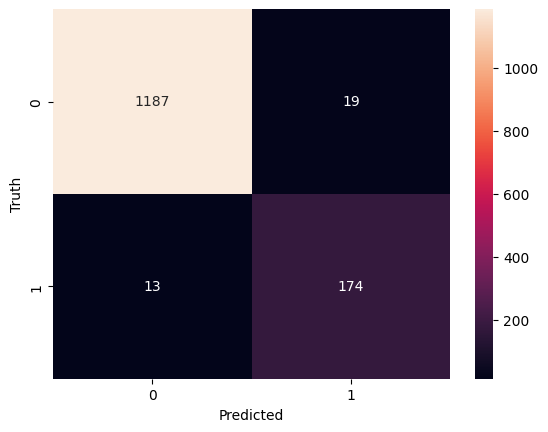

In [13]:
# #import BERT model
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# # #import ALBERT - A Lite BERT model
# # bert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")

# # #import RoBERTa - Robustly Optimized BERT Pretraining Approach
# # bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
# # bert_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")

import numpy as np
import pandas as pd

path = r"C:\Users\Nitin\Downloads\spam_detection\model"

df = pd.read_csv("Email Spam.csv")
df.head()

df_balanced = df[['Category','Message']]
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.head()
# df['labels'].value_counts(normalize=True) * 100

# # #class Bert 
bertExe = BERT(bert_preprocess,  bert_encoder, df_balanced, 'Message', 'spam', 10, path)
model = bertExe.run_all()

In [16]:
from keras.models import load_model

model = load_model(path)

In [22]:
y_predicted = model.predict(["Ok lar... Joking wif u oni..."])
y_predicted = np.where(y_predicted > 0.5, 'Ham', 'Spam')
y_predicted

1/1 [==============================] - 0s 68ms/step


array([['Spam']], dtype='<U4')

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
        preprocessed_text = bert_preprocess(text_input)

In [23]:
df = pd.read_csv("Email Spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df_balanced = df[['Category','Message']]
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [11]:
df['Category'].value_counts(normalize=True) * 100


Category
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [9]:
df_balanced['spam'].value_counts(normalize=True) * 100


spam
0    71.01141
1    28.98859
Name: proportion, dtype: float64